# Front page example (XGBoost)

The code from the front page example using XGBoost.

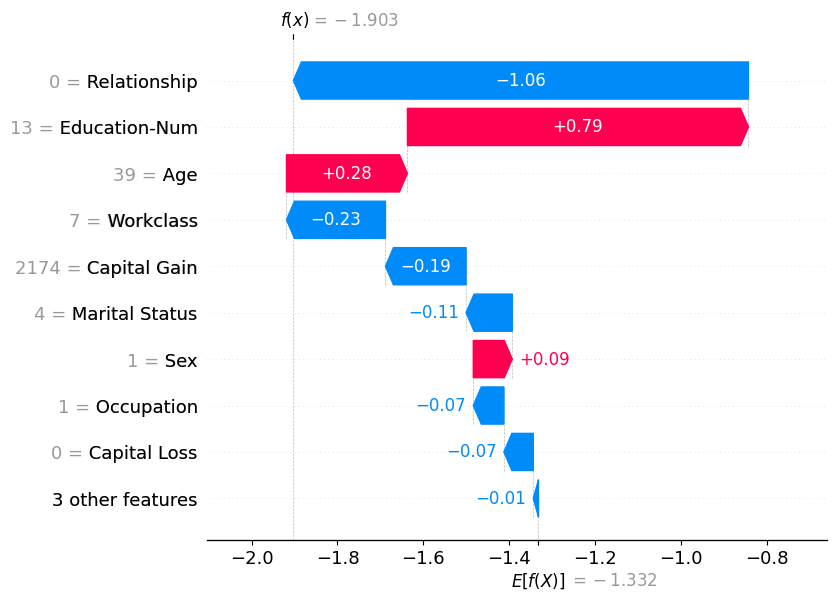

In [1]:
import warnings

import xgboost

import shap

warnings.filterwarnings("ignore")

# train XGBoost model
X, y = shap.datasets.adult()
model = xgboost.XGBClassifier(max_depth=1, learning_rate=0.5).fit(X, y)

# explain the model's predictions using SHAP values
# (same syntax works for LightGBM, CatBoost, and scikit-learn models)
# background = shap.maskers.TabularPartitions(X, sample=100)
# def f(x):
#     return shap.links.identity(model.predict_proba(x, validate_features=False)[:,1])
explainer = shap.TreeExplainer(model)
shap_values = explainer(X[:100])

# visualize the first prediction's explanation
shap.plots.waterfall(shap_values[0])

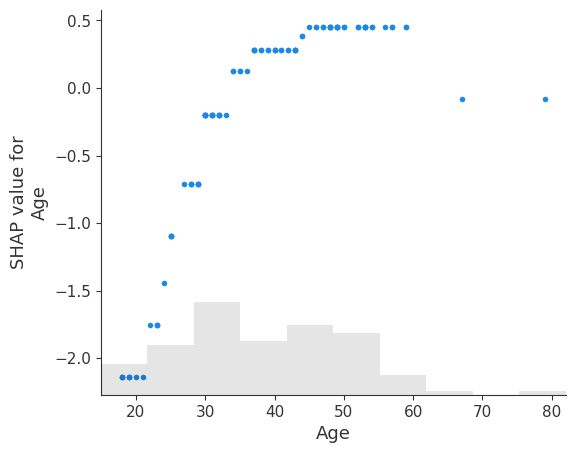

In [2]:
shap.plots.scatter(shap_values[:, "Age"])

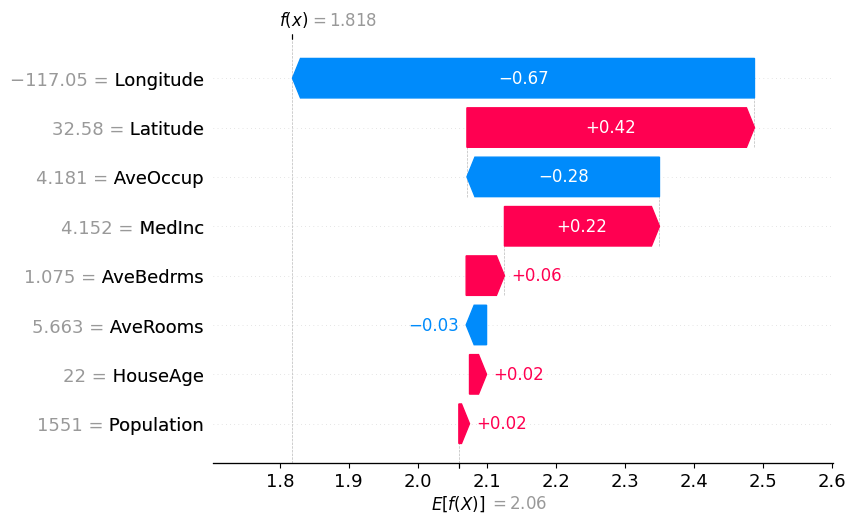

In [3]:
import xgboost

import shap

# train XGBoost model
X, y = shap.datasets.california(n_points=2000)
model = xgboost.XGBRegressor(max_depth=1).fit(X, y)

# explain the model's predictions using SHAP values
# (same syntax works for LightGBM, CatBoost, and scikit-learn models)
explainer = shap.TreeExplainer(model)
shap_values = explainer(X)

# visualize the first prediction's explanation
shap.plots.waterfall(shap_values[0])

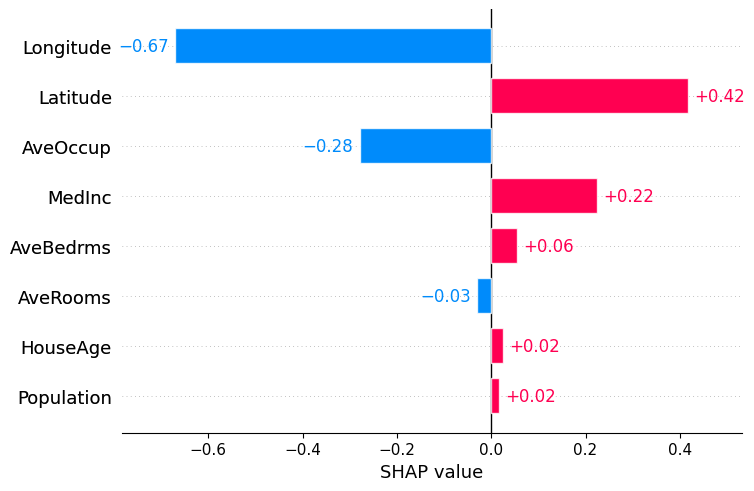

In [4]:
# plot the global importance of each feature
shap.plots.bar(shap_values[0])

In [5]:
shap.plots.initjs()

# visualize the first prediction's explanation
shap.plots.force(shap_values[0])

In [6]:
# visualize the first prediction's explanation
shap.plots.force(shap_values[:100])

In [7]:
shap_values.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

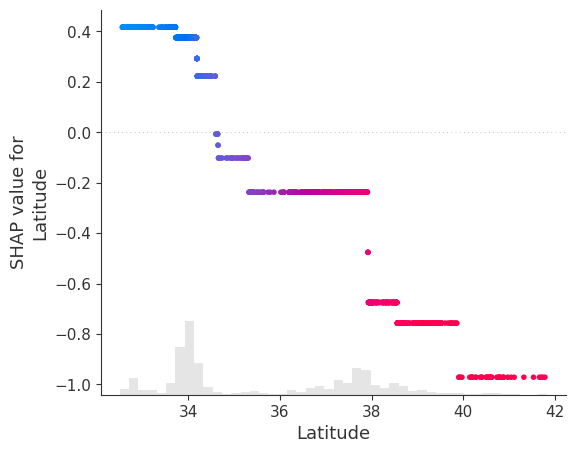

In [8]:
# plot the importance of a single feature across all samples
shap.plots.scatter(shap_values[:, "Latitude"], color=shap_values)

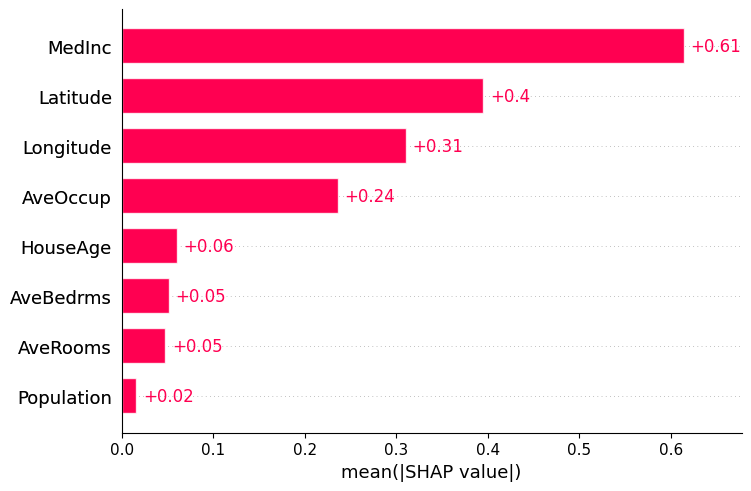

In [9]:
# plot the global importance of each feature
shap.plots.bar(shap_values)

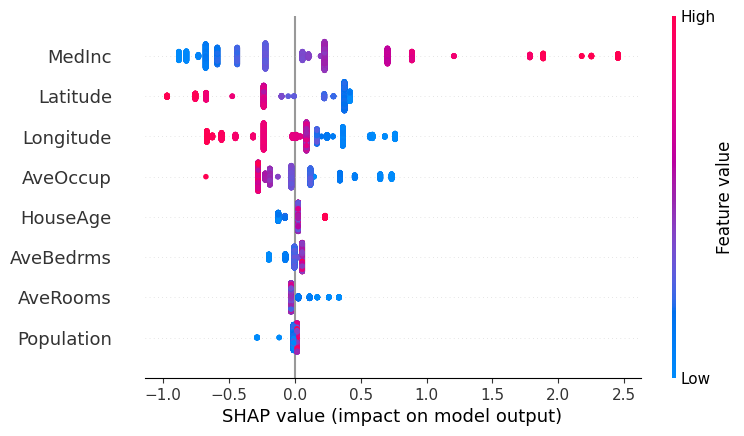

In [10]:
# plot the distribution of importances for each feature over all samples
shap.plots.beeswarm(shap_values)